In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
!ls

WDI - Dataset
Week5-Visualization
World Development Indicators.ipynb
__MACOSX


In [3]:
data = pd.read_csv('WDI - Dataset/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [6]:
data.groupby('CountryName').count().shape

(247, 5)

In [7]:
CountryCodes = data['CountryCode'].unique().tolist()
len(CountryCodes)

247

In [8]:
Indicators = data['IndicatorName'].unique().tolist()
len(Indicators)

1344

In [9]:
type(Indicators)

list

In [10]:
years = data['Year'].unique().tolist()
len(years)

56

In [11]:
min(years), "to", max(years)

(1960, 'to', 2015)

# MatplotLLib

In [12]:
hist_indicator = 'CO2'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage =data[mask1 & mask2]

In [13]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11575,India,IND,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,1.174578
11576,India,IND,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,120581.961000
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
11578,India,IND,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,0.000000
11579,India,IND,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000


In [14]:
data[data['CountryCode'].str.contains('IND')].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11561,India,IND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,103.938000
11562,India,IND,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,76.559538
11563,India,IND,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.403730
11564,India,IND,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.155808
11565,India,IND,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,42.561131


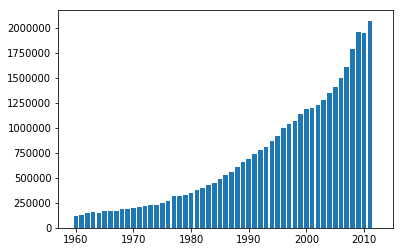

In [15]:
years = stage['Year'].values
co2 = stage['Value'].values

plt.bar(years, co2)
plt.show()

In [16]:
type(stage['IndicatorName'])

pandas.core.series.Series

In [17]:
stage['IndicatorName'].iloc[0]

'CO2 emissions (kg per 2005 US$ of GDP)'

In [18]:
stage['IndicatorName'].index[0]

11575

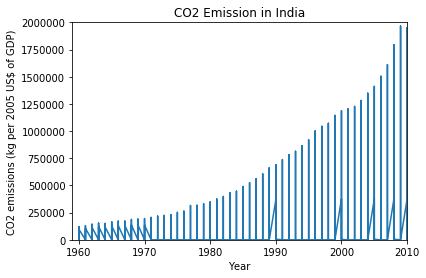

<Figure size 6840x6840 with 0 Axes>

In [19]:
# line plot

plt.plot(stage['Year'].values, stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].loc[11575])

plt.title('CO2 Emission in India')
plt.axis([1959, 2010, 0, 2000000])
plt.figure(figsize=(95, 95))
plt.show()

In [20]:
type(stage['Value'])

pandas.core.series.Series

In [21]:
stage['Value'].values.shape

(819,)

In [22]:
type(stage['Value'].values)

numpy.ndarray

In [23]:
hist_data = stage['Value'].values
hist_data.shape

(819,)

In [24]:
len(hist_data)

819

C:\Users\Xenon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


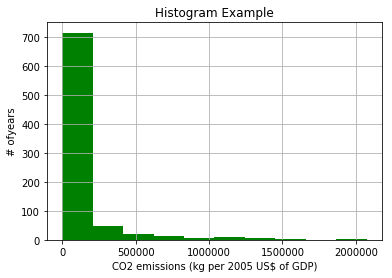

In [25]:
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# ofyears')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [26]:
hist_indicator = 'CO2'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])
mask2_copy = data['Year'] == hist_year

co2_2011 = data[mask1 & mask2]
print(co2_2011.shape)
co2_2011.head()

(3512, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026271,Arab World,ARB,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,2011,1.089930e+00
5026272,Arab World,ARB,CO2 emissions (kg per 2011 PPP $ of GDP),EN.ATM.CO2E.PP.GD.KD,2011,3.240587e-01
5026273,Arab World,ARB,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,2011,3.240587e-01
5026274,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,2011,1.704418e+06
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500e+00


In [27]:
data[mask1 & mask2_copy].shape

(3512, 6)

In [28]:
print(len(co2_2011))

3512


In [29]:
hist_indicator = 'GDP per capita'
hist_country = 'IND'

mask1 =data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
11617,India,IND,GDP per capita (constant LCU),NY.GDP.PCAP.KN,1960,15203.854641
11618,India,IND,GDP per capita (current LCU),NY.GDP.PCAP.CN,1960,399.021904
11619,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,83.794684
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053


In [30]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11575,India,IND,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,1.174578
11576,India,IND,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,120581.961000
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
11578,India,IND,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,0.000000
11579,India,IND,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000


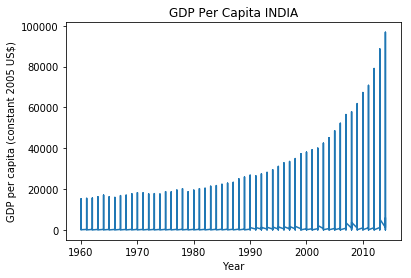

In [31]:
plt.plot(gdp_stage ['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])


plt.title('GDP Per Capita INDIA')

plt.show()

In [32]:
gdp_stage['Year'].min(), gdp_stage['Year'].max()

(1960, 2014)

In [33]:
stage['Year'].min(), stage['Year'].max()

(1960, 2012)

In [34]:
new_gdp = gdp_stage[gdp_stage['Year'] <= 2012]
new_gdp['Year'].min(), new_gdp['Year'].max()

(1960, 2012)

ValueError: x and y must be the same size

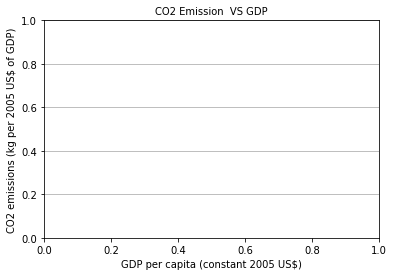

In [35]:
%matplotlib inline

fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('CO2 Emission  VS GDP', fontsize=10)
axis.set_xlabel(new_gdp['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize=10)

X = new_gdp['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

# Folium

In [48]:
import folium

In [37]:
!ls

WDI - Dataset
Week5-Visualization
World Development Indicators.ipynb
__MACOSX


In [38]:
country_geo = 'WDI - Dataset/world-countries.json'
country_geo

'WDI - Dataset/world-countries.json'

In [39]:
data.shape

(5656458, 6)

In [40]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [41]:
mask1 = data['IndicatorName'].str.contains('CO2 emissions')
mask2 = data['Year'] == 2011

stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026271,Arab World,ARB,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,2011,1.089930e+00
5026272,Arab World,ARB,CO2 emissions (kg per 2011 PPP $ of GDP),EN.ATM.CO2E.PP.GD.KD,2011,3.240587e-01
5026273,Arab World,ARB,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,2011,3.240587e-01
5026274,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,2011,1.704418e+06
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500e+00


In [42]:
plot_data = stage[['CountryCode', 'Value']]
plot_data.head()

,CountryCode,Value
5026271,ARB,1.089930e+00
5026272,ARB,3.240587e-01
5026273,ARB,3.240587e-01
5026274,ARB,1.704418e+06
5026275,ARB,4.724500e+00


In [43]:
hist_indicator =stage.iloc[0]['IndicatorName']
hist_indicator

'CO2 emissions (kg per 2005 US$ of GDP)'

In [44]:
mapFolium = folium.Map(location=[100, 0], zoom_start=1.5)

In [50]:
folium.Choropleth(geo_data = country_geo, 
               data=plot_data,
              columns=['CountryCode', 'Value'],
              key_on='feature.id',
              fill_color = 'YlGnBu', 
               fill_opacity=0.7,
              line_opacity=0.2, 
               legend_name=hist_indicator).add_to(mapFolium)

In [52]:
type(mapFolium)

folium.folium.Map